In [8]:
using BeamLib: IsotropicArray, steer, ols
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Θ = deg2rad.([10, 65])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:5)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
x = s + n

θgrid = Vector(-90:90)
A = steer(pa, fc, deg2rad.(θgrid)')
@time spectrum = ols(x, A, d)
Θest = θgrid[spectrum .> 0]

  0.575242 seconds (8.84 k allocations: 961.244 MiB, 24.90% gc time)


2-element Vector{Int64}:
 10
 65

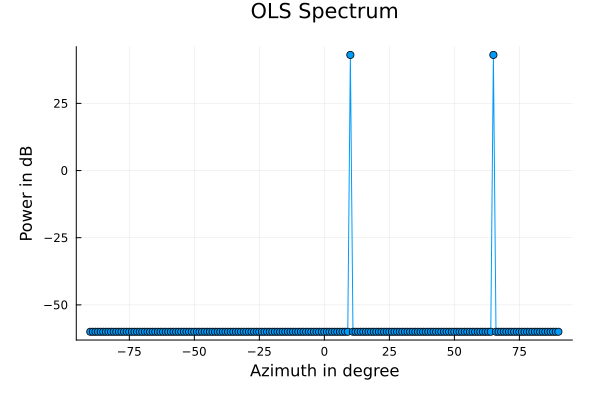

In [9]:
using Plots
import Measures

# clip OLS spectrum to show the zero-entries
spectrum_clipped = max.(spectrum, 1e-6)

p1 = plot(θgrid, 10*log10.((spectrum_clipped)),marker=:dot, legend=false)
plot!(title="OLS Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")